<a href="https://colab.research.google.com/github/roochathakkar05/ProjectEdyodaHTMLCSS/blob/master/Model_2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!pip install tldextract
!pip install python-whois
import regex    
from tldextract import extract
import ssl
import socket
from bs4 import BeautifulSoup
import urllib, bs4, re
import urllib.request
import googlesearch
import whois
from datetime import datetime, timezone
import time
import pandas as pd
import numpy as np
import re
import os.path
import requests
from urllib.parse import urlparse,urlencode
import ipaddress
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
training_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/urldatafinal.csv')
training_data = training_data.drop("Unnamed: 0",axis=1)

In [ ]:
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12040 entries, 0 to 12039
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        12040 non-null  int64  
 1   url                 12040 non-null  object 
 2   label               12040 non-null  object 
 3   result              12040 non-null  int64  
 4   have_ip_address     12040 non-null  int64  
 5   url_length          12040 non-null  int64  
 6   url_shortener       12040 non-null  int64  
 7   have_atrate_symbol  12040 non-null  int64  
 8   have_subdomain      12040 non-null  int64  
 9   redirection         12040 non-null  int64  
 10  httpDomain          12040 non-null  int64  
 11  prefixSuffix        12040 non-null  int64  
 12  getDepth            12040 non-null  int64  
 13  domainAge           10659 non-null  float64
dtypes: float64(1), int64(11), object(2)
memory usage: 1.3+ MB
None


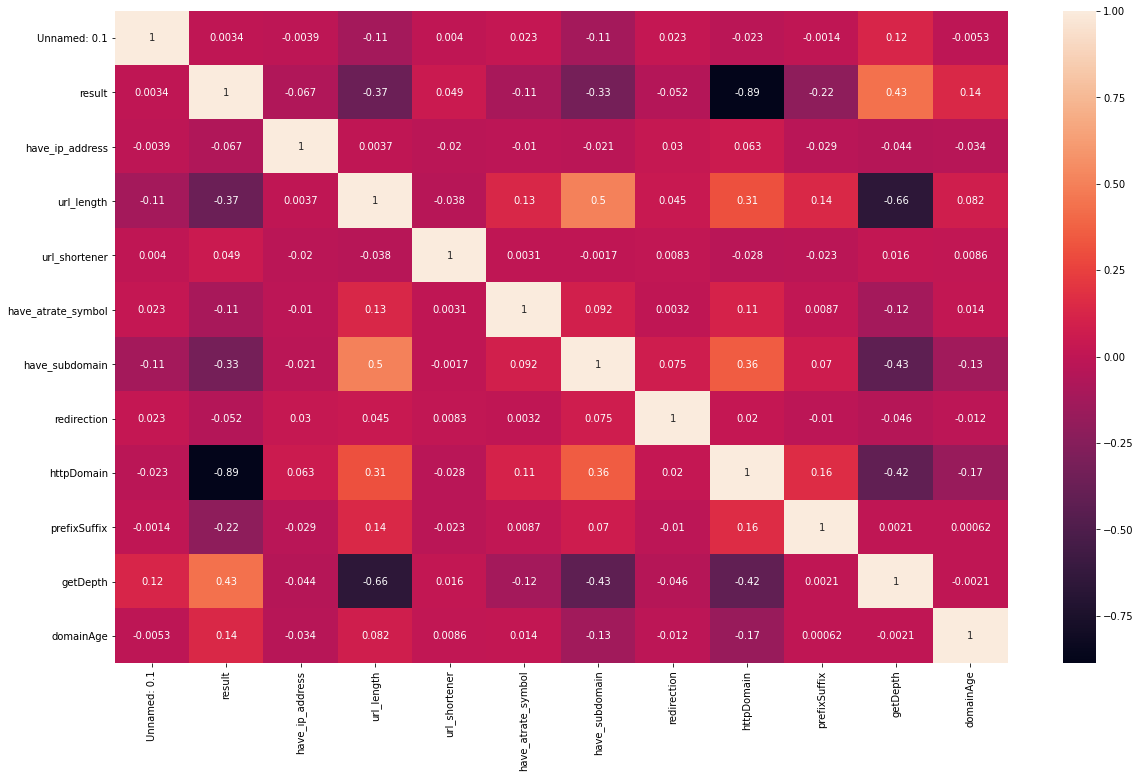

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = training_data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
X=training_data.iloc[:,4:13].values
y=training_data.iloc[:,[3]].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_test shape: {y_test.shape}')

X_train shape: (8066, 9)
Y_train shape: (8066, 1)
X_test shape: (3974, 9)
Y_test shape: (3974, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='relu',input_shape=(9,)))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
print("Shape")
model.output_shape
print("Summary")
model.summary()
print("config")
model.get_config()
print("Weight")
model.get_weights()

Shape
Summary
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                100       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
config
Weight


[array([[ 0.34641045, -0.25573826, -0.09899127,  0.3170693 ,  0.12017506,
         -0.33312798, -0.04806602,  0.31051838,  0.47273642,  0.19631815],
        [-0.5274683 ,  0.18305898,  0.5045425 , -0.43580264, -0.00593221,
          0.00388074, -0.21485394, -0.04117948, -0.37518674, -0.0615347 ],
        [ 0.21872717, -0.25400496,  0.51272863, -0.00506538, -0.3211261 ,
         -0.39170521,  0.2792179 , -0.02113867,  0.30717987,  0.21320641],
        [ 0.08335811,  0.54225165,  0.45336646,  0.2825594 ,  0.04786503,
          0.25599992, -0.06359479,  0.28869808,  0.18746942,  0.22545403],
        [-0.29655838,  0.11060572, -0.16066533, -0.08739614,  0.11592829,
         -0.55532455, -0.20612222, -0.3083739 , -0.2252911 , -0.05856627],
        [ 0.24374664, -0.24227437, -0.12537   , -0.25829577,  0.18261242,
          0.439717  ,  0.10451984,  0.4157369 , -0.31673717, -0.15068212],
        [ 0.41150504, -0.11801386, -0.48136187, -0.3201337 ,  0.14529842,
         -0.07878393, -0.2359116

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=300,batch_size=10,verbose=1)

Epoch 1/300
807/807 [==============================] - 2s 1ms/step - loss: 0.3933 - accuracy: 0.8617
Epoch 2/300
807/807 [==============================] - 1s 1ms/step - loss: 0.1487 - accuracy: 0.9531
Epoch 3/300
807/807 [==============================] - 1s 1ms/step - loss: 0.1099 - accuracy: 0.9557
Epoch 4/300
807/807 [==============================] - 1s 1ms/step - loss: 0.1086 - accuracy: 0.9525
Epoch 5/300
807/807 [==============================] - 1s 1ms/step - loss: 0.1020 - accuracy: 0.9595
Epoch 6/300
807/807 [==============================] - 1s 1ms/step - loss: 0.1026 - accuracy: 0.9599
Epoch 7/300
807/807 [==============================] - 1s 1ms/step - loss: 0.0959 - accuracy: 0.9591
Epoch 8/300
807/807 [==============================] - 1s 1ms/step - loss: 0.1050 - accuracy: 0.9579
Epoch 9/300
807/807 [==============================] - 1s 1ms/step - loss: 0.0916 - accuracy: 0.9652
Epoch 10/300
807/807 [==============================] - 1s 1ms/step - loss: 0.0973 - accura

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

125/125 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9620
[0.09630213677883148, 0.9620029926300049]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred.round())

array([[1625,   57],
       [  94, 2198]])

In [ ]:
from sklearn.metrics import precision_recall_curve
from numpy import argmax
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
fscore = (2 * precision * recall) / (precision + recall)
print ("thresholds")
print(thresholds)
print ("fscore")
print(fscore)
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

thresholds
[0.0088689  0.0133794  0.01367638 0.0147627  0.01489416 0.0164212
 0.01966488 0.0207766  0.0232487  0.03926131 0.03926137 0.05734497
 0.0652869  0.07190177 0.08160886 0.08753118 0.09855729 0.09903416
 0.09903428 0.10046077 0.15332973 0.16271302 0.17214909 0.17214915
 0.1789957  0.185918   0.18591806 0.18825918 0.19651684 0.2189801
 0.2189802  0.25607198 0.25710058 0.27271092 0.28747278 0.3149917
 0.37115422 0.43372288 0.4337229  0.5106743  0.5106744  0.53808445
 0.55490816 0.563352   0.6568754  0.6772414  0.6848676  0.69082105
 0.71270525 0.7854457  0.84704363 0.87336934 0.9723985  0.97421753
 0.97505456 0.9785174  0.9852272  0.9889915  0.9956977  0.9967996
 0.9989717  0.99921715 0.99929225 0.99969673 0.99982864 0.9999236
 0.9999337  0.9999537  0.9999566  0.9999671  0.99996775 0.9999678
 0.99997336 0.9999826  0.9999865  0.9999919  0.9999938  0.99999595
 0.99999714 0.9999977  0.9999981  0.99999857 0.9999987  0.9999989
 0.999999   0.99999905 0.9999992  0.9999994  0.99999946 0.

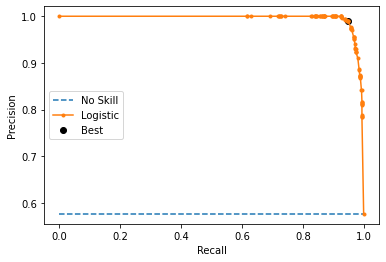

In [ ]:
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [ ]:
def have_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        haveipaddress = -1
    else:
        haveipaddress = 1
    return haveipaddress


In [ ]:
def url_length(url):
    if len(url)<54:
        urllength = 1
    else:
        urllength = -1
    return urllength

In [ ]:
def url_shortener(url):
    match=re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                    'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                    'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                    'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                    'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                    'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                    'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net',url)

    if match:
        urlshortener = -1
    else:
        urlshortener = 1
    return urlshortener

In [ ]:
def have_atrate_symbol(url):
    match = re.search('@',url)

    if match:
        haveatratesymbol = -1
    else:
        haveatratesymbol =  1   
    return haveatratesymbol    

In [ ]:
def have_subdomain(url):
    if(have_ip_address(url)==-1):
        match = re.search('(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5]))|(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}',url)
        pos = match.end(0)
        url = url[pos:]
    list = [x.start(0) for x in re.finditer('\.',url)]
    if len(list)<=3:
        havesubdomain =  1
    else:
        havesubdomain = -1
    return havesubdomain


In [ ]:
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      redirectioner =  -1
    else:
      redirectioner = 1
  else:
    redirectioner = 1
  return redirectioner

In [ ]:
def httpDomain(url):
  if 'https' in url:
    httpdomain = 1
  else:
    httpdomain = -1
  return httpdomain

In [ ]:
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        prefixsuffix = -1            # phishing
    else:
        prefixsuffix = 1            # legitimate
    return prefixsuffix

In [ ]:
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [ ]:
def domainAge(url):
  dns = 0
  try:
    domain_name = whois.whois(urlparse(url).netloc)
    print(domain_name)
    creation_date = domain_name.creation_date
    expiration_date = domain_name.expiration_date
    if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
      try:
        creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
        expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
      except:
        return 1
    if ((expiration_date is None) or (creation_date is None)):
        return 1
    elif ((type(expiration_date) is list) or (type(creation_date) is list)):
        return 1
    else:
      ageofdomain = abs((expiration_date - creation_date).days)
      if ((ageofdomain/30) < 6):
        age = 1
      else:
        age = 0
      return age
  except:
    dns = 1


In [ ]:
def GetFeatures (url):
  feature_array = np.array([])
  hia = have_ip_address(url)
  ul = url_length(url)
  us = url_shortener(url)
  hs = have_subdomain(url)
  r = redirection(url)
  hd = httpDomain(url)
  ps = prefixSuffix(url)
  d = getDepth(url)
  a = domainAge(url)
  feature_array= np.append(feature_array,[hia,ul,us,hs,r,hd,ps,d,a])
  feature_array = feature_array.reshape(1,-1)
  return feature_array

In [ ]:
UserUrl = input("Please enter the URL to test")
features = GetFeatures(UserUrl)
print(features)

Please enter the URL to testhttp://99utilities.com.br/olele/2016gdoc/index.html...
{
  "domain_name": null,
  "registrant_name": null,
  "registrant_id": null,
  "country": null,
  "owner_c": null,
  "admin_c": null,
  "tech_c": null,
  "billing_c": null,
  "name_server": null,
  "nsstat": null,
  "nslastaa": null,
  "saci": null,
  "creation_date": null,
  "updated_date": null,
  "expiration_date": null,
  "status": null,
  "nic_hdl_br": null,
  "person": null,
  "email": null
}
[[ 1. -1.  1. -1.  1. -1.  1.  3.  1.]]


In [ ]:
resultofprediction = model.predict(features)
print(resultofprediction)

[[0.86558574]]


In [ ]:
if resultofprediction <= 0.558084:
  label = "Benign"
else:
  label = "Malicious"
print(label)

Malicious
